In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV




from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier


In [4]:
df = pd.read_csv('credit_customers.csv', sep = ',')


In [5]:
df.head(5)


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [7]:
df.describe()


,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [8]:
df.dtypes


checking_status            object
duration                  float64
credit_history             object
purpose                    object
credit_amount             float64
savings_status             object
employment                 object
installment_commitment    float64
personal_status            object
other_parties              object
residence_since           float64
property_magnitude         object
age                       float64
other_payment_plans        object
housing                    object
existing_credits          float64
job                        object
num_dependents            float64
own_telephone              object
foreign_worker             object
class                      object
dtype: object

In [9]:
(df.isnull().sum()/len(df))


checking_status           0.0
duration                  0.0
credit_history            0.0
purpose                   0.0
credit_amount             0.0
savings_status            0.0
employment                0.0
installment_commitment    0.0
personal_status           0.0
other_parties             0.0
residence_since           0.0
property_magnitude        0.0
age                       0.0
other_payment_plans       0.0
housing                   0.0
existing_credits          0.0
job                       0.0
num_dependents            0.0
own_telephone             0.0
foreign_worker            0.0
class                     0.0
dtype: float64

<AxesSubplot:>

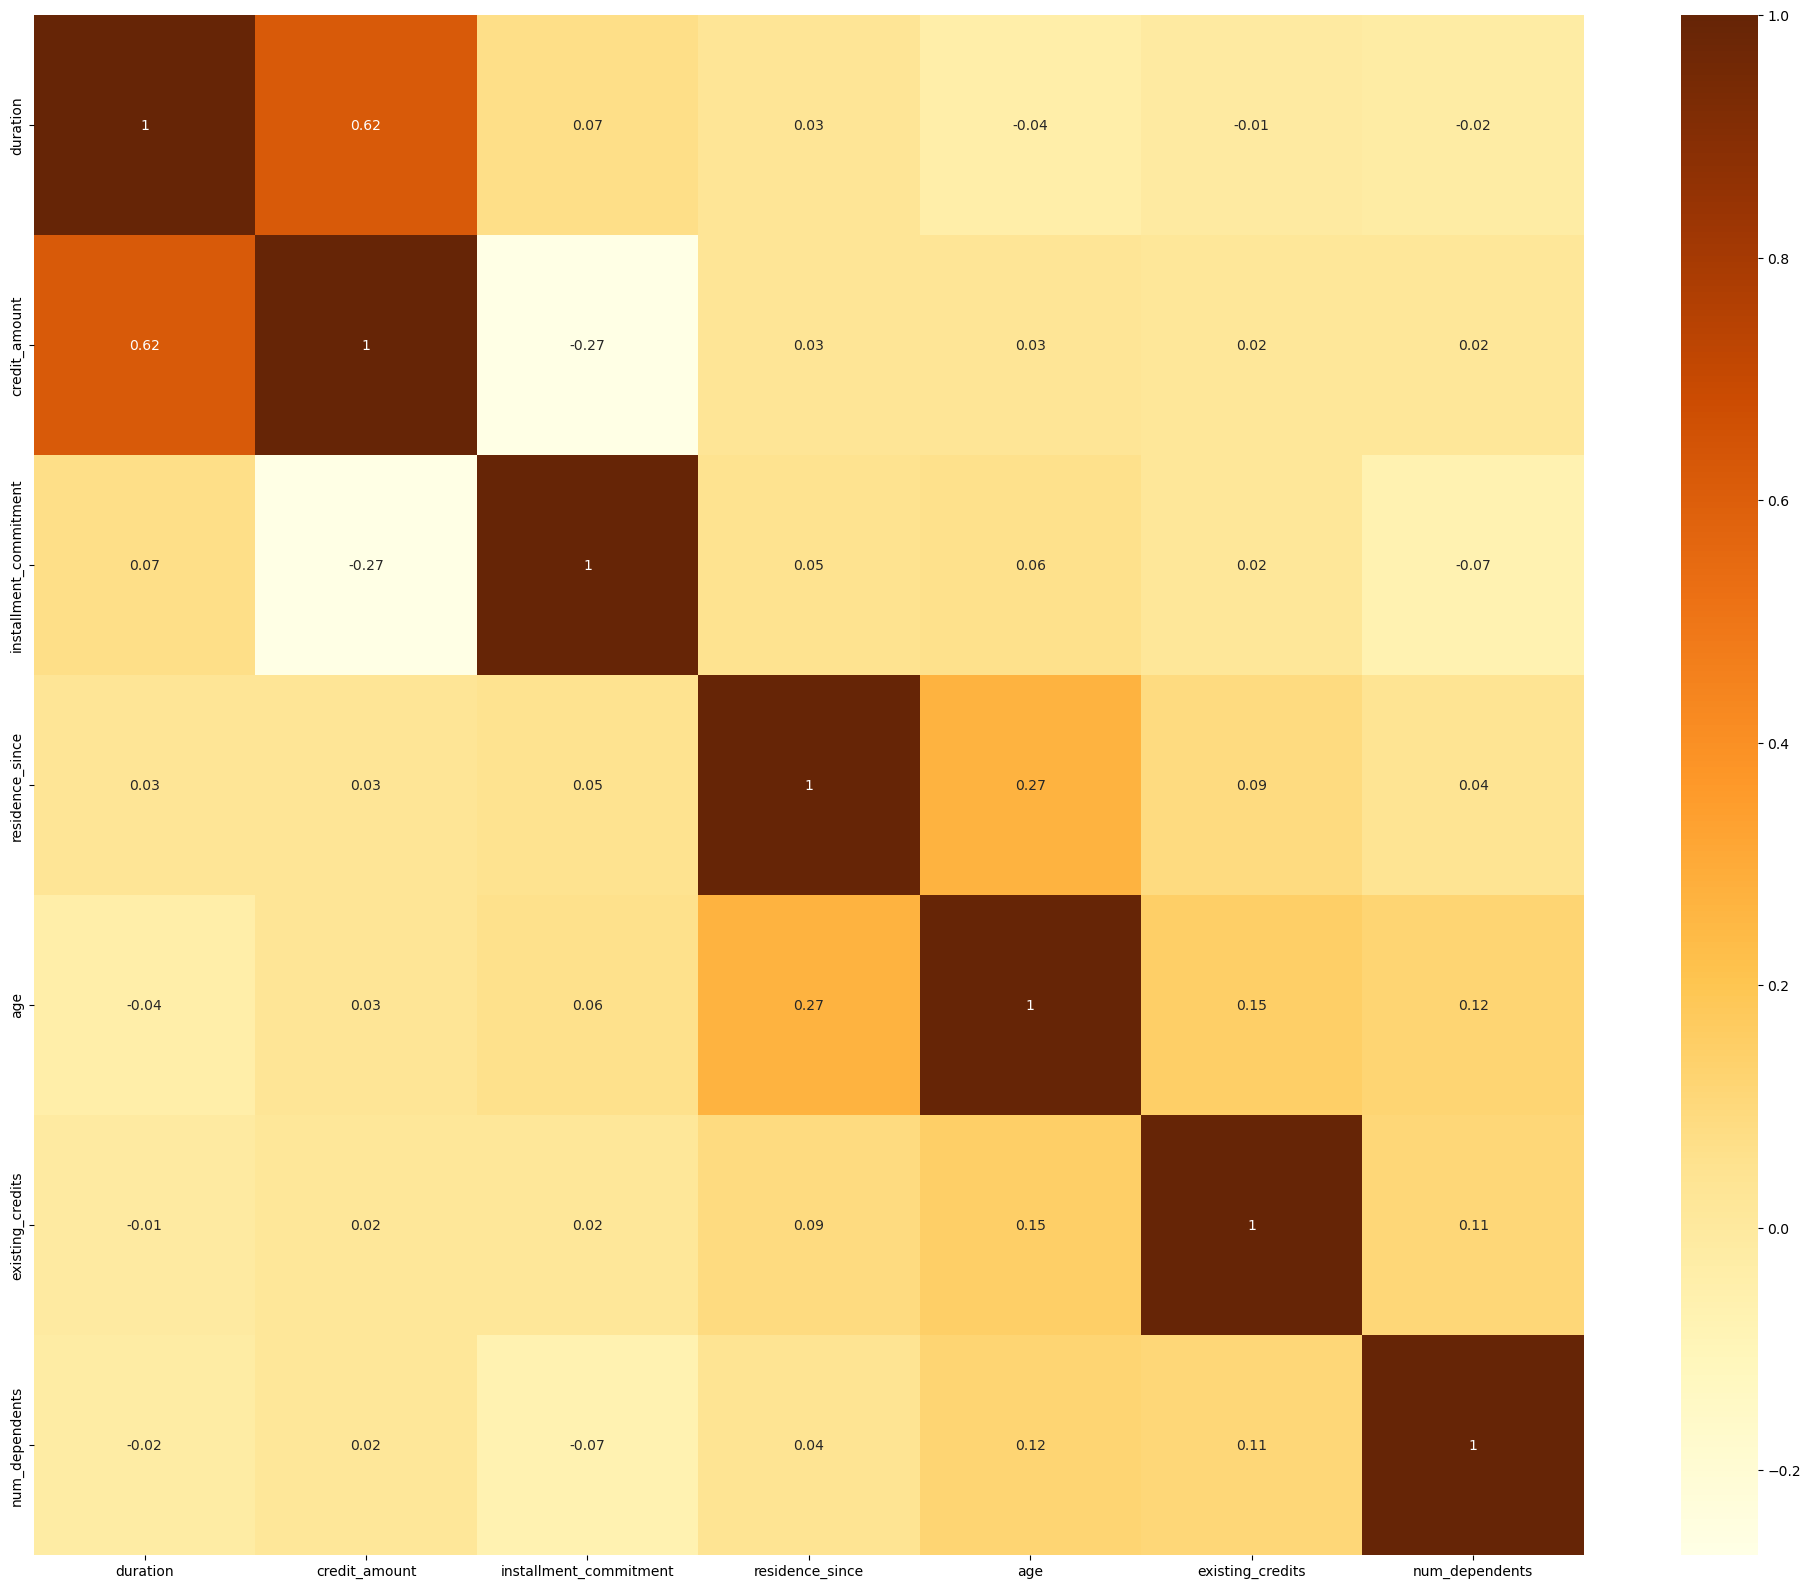

In [10]:
corr = df.corr().round(2)
plt.figure(figsize = (25,20))
sns.heatmap(corr, annot = True, cmap = 'YlOrBr')

<AxesSubplot:title={'center':'Variable property_magnitude'}, xlabel='property_magnitude', ylabel='count'>

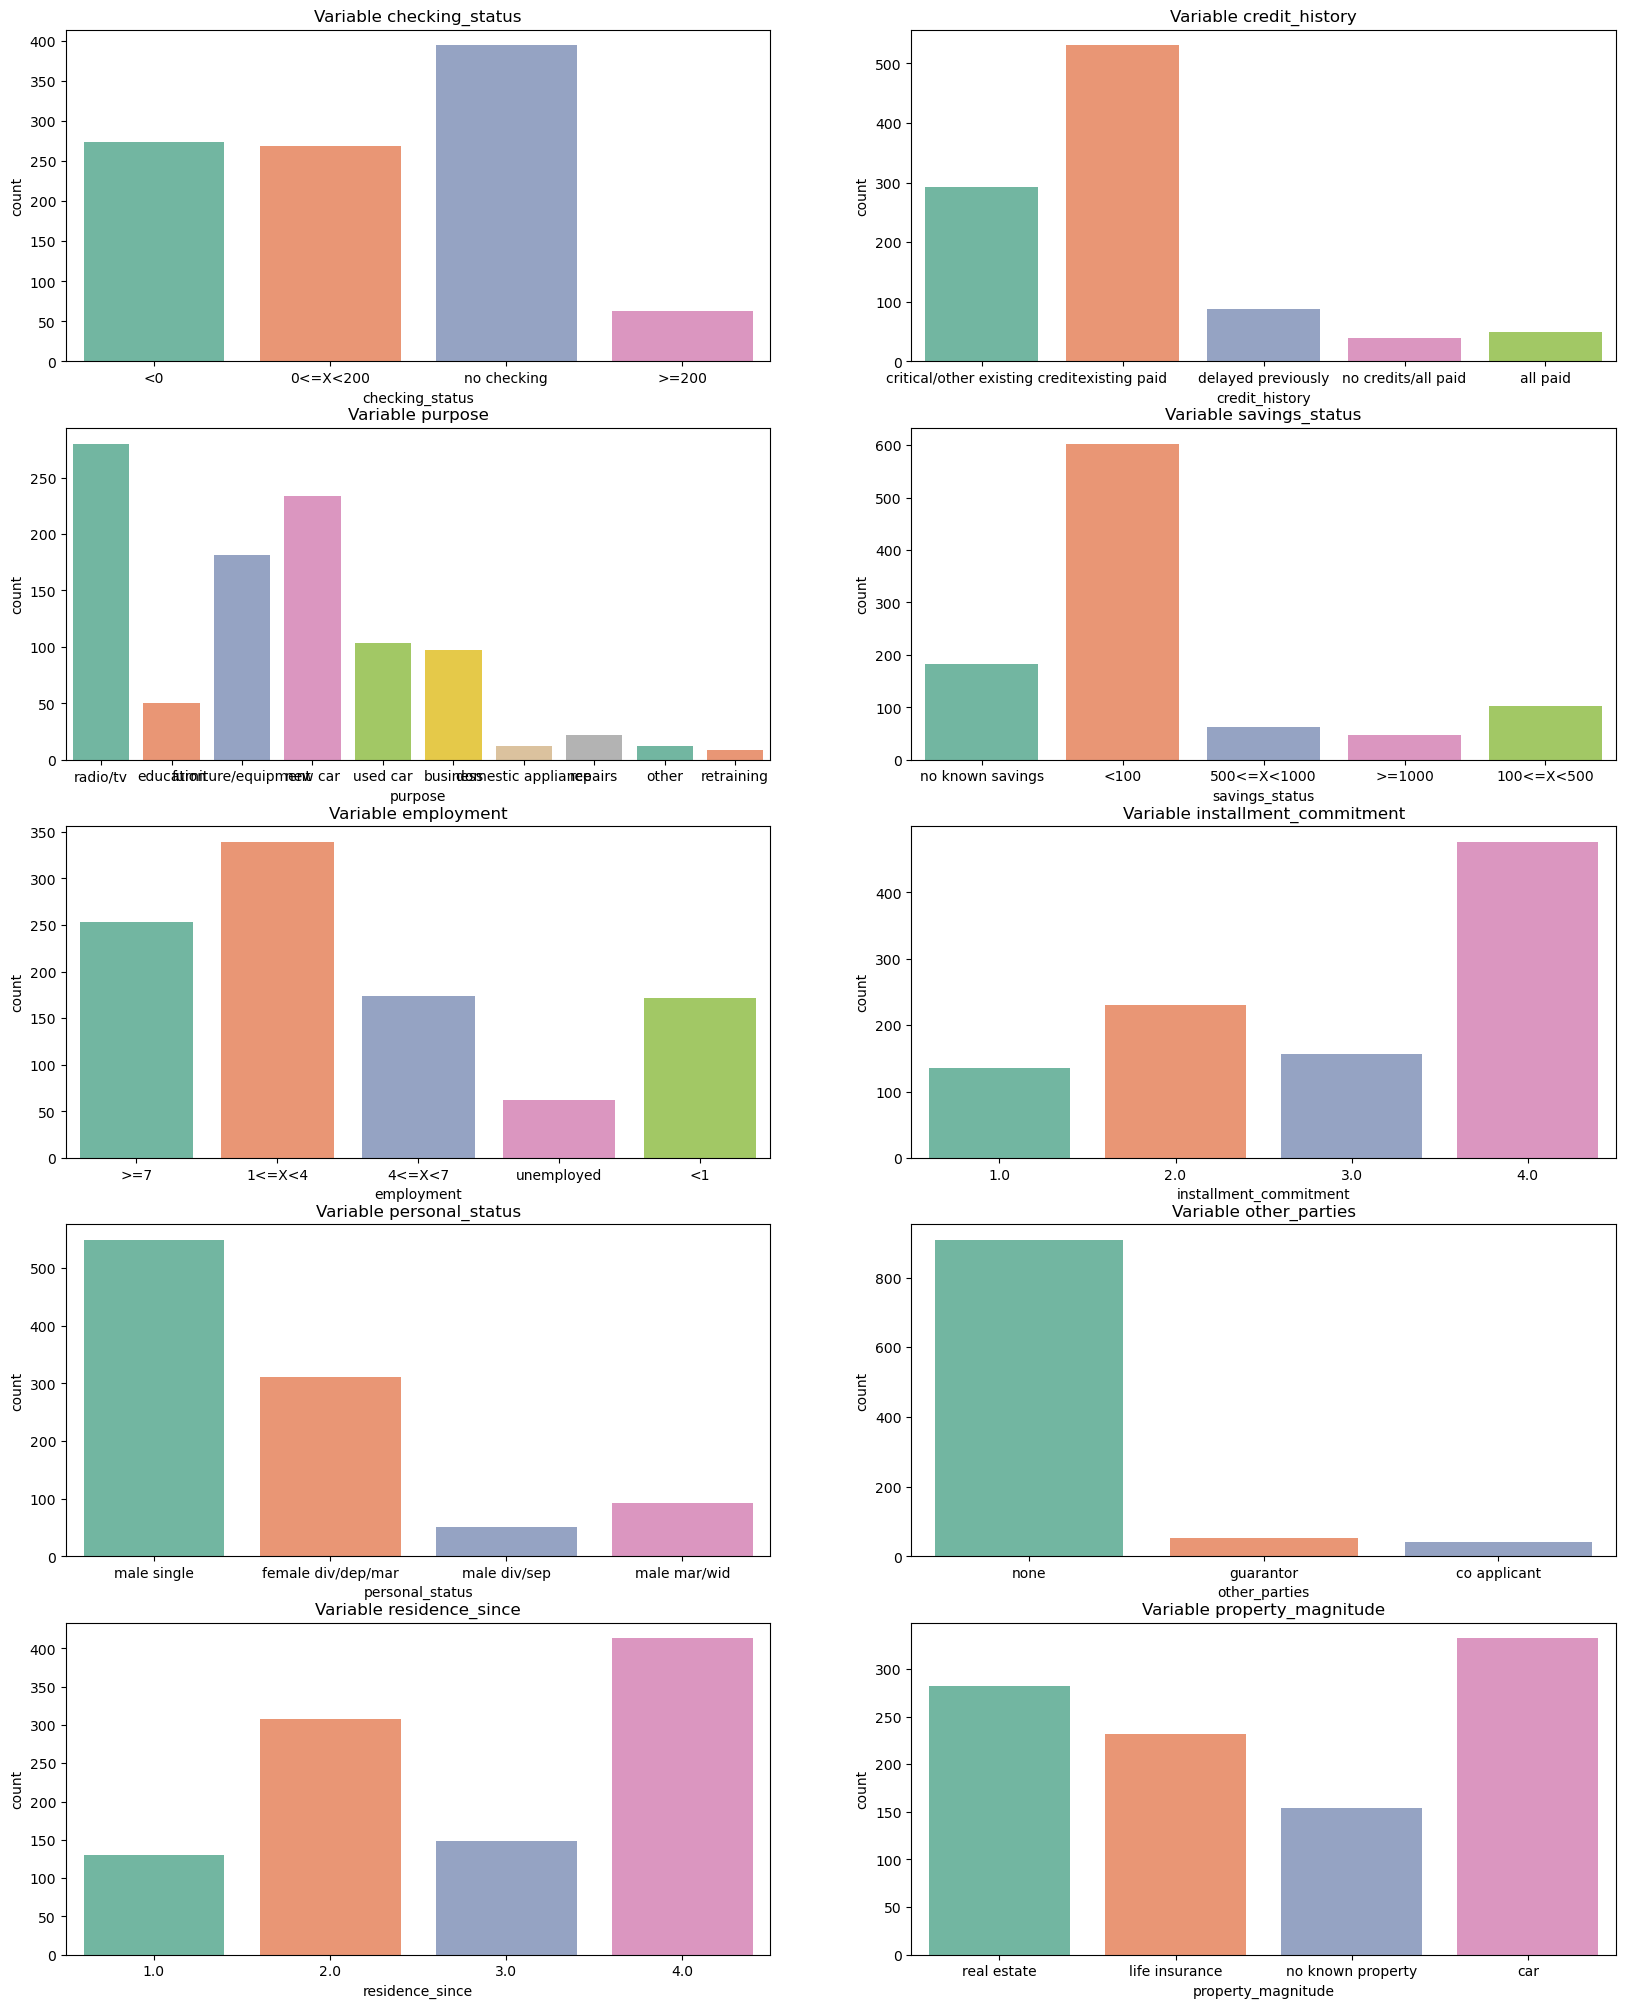

In [11]:
plt.figure(figsize = (20, 25))

plt.subplot(5, 2, 1)
plt.gca().set_title('Variable checking_status')
sns.countplot(x = 'checking_status', palette = 'Set2', data = df)

plt.subplot(5, 2, 2)
plt.gca().set_title('Variable credit_history')
sns.countplot(x = 'credit_history', palette = 'Set2', data = df)

plt.subplot(5, 2, 3)
plt.gca().set_title('Variable purpose')
sns.countplot(x = 'purpose', palette = 'Set2', data = df)

plt.subplot(5, 2, 4)
plt.gca().set_title('Variable savings_status')
sns.countplot(x = 'savings_status', palette = 'Set2', data = df)

plt.subplot(5, 2, 5)
plt.gca().set_title('Variable employment')
sns.countplot(x = 'employment', palette = 'Set2', data = df)

plt.subplot(5, 2, 6)
plt.gca().set_title('Variable installment_commitment')
sns.countplot(x = 'installment_commitment', palette = 'Set2', data = df)

plt.subplot(5, 2, 7)
plt.gca().set_title('Variable personal_status')
sns.countplot(x = 'personal_status', palette = 'Set2', data = df)

plt.subplot(5, 2, 8)
plt.gca().set_title('Variable other_parties')
sns.countplot(x = 'other_parties', palette = 'Set2', data = df)

plt.subplot(5, 2, 9)
plt.gca().set_title('Variable residence_since')
sns.countplot(x = 'residence_since', palette = 'Set2', data = df)

plt.subplot(5, 2, 10)
plt.gca().set_title('Variable property_magnitude')
sns.countplot(x = 'property_magnitude', palette = 'Set2', data = df)


<AxesSubplot:title={'center':'Variable class'}, xlabel='class', ylabel='count'>

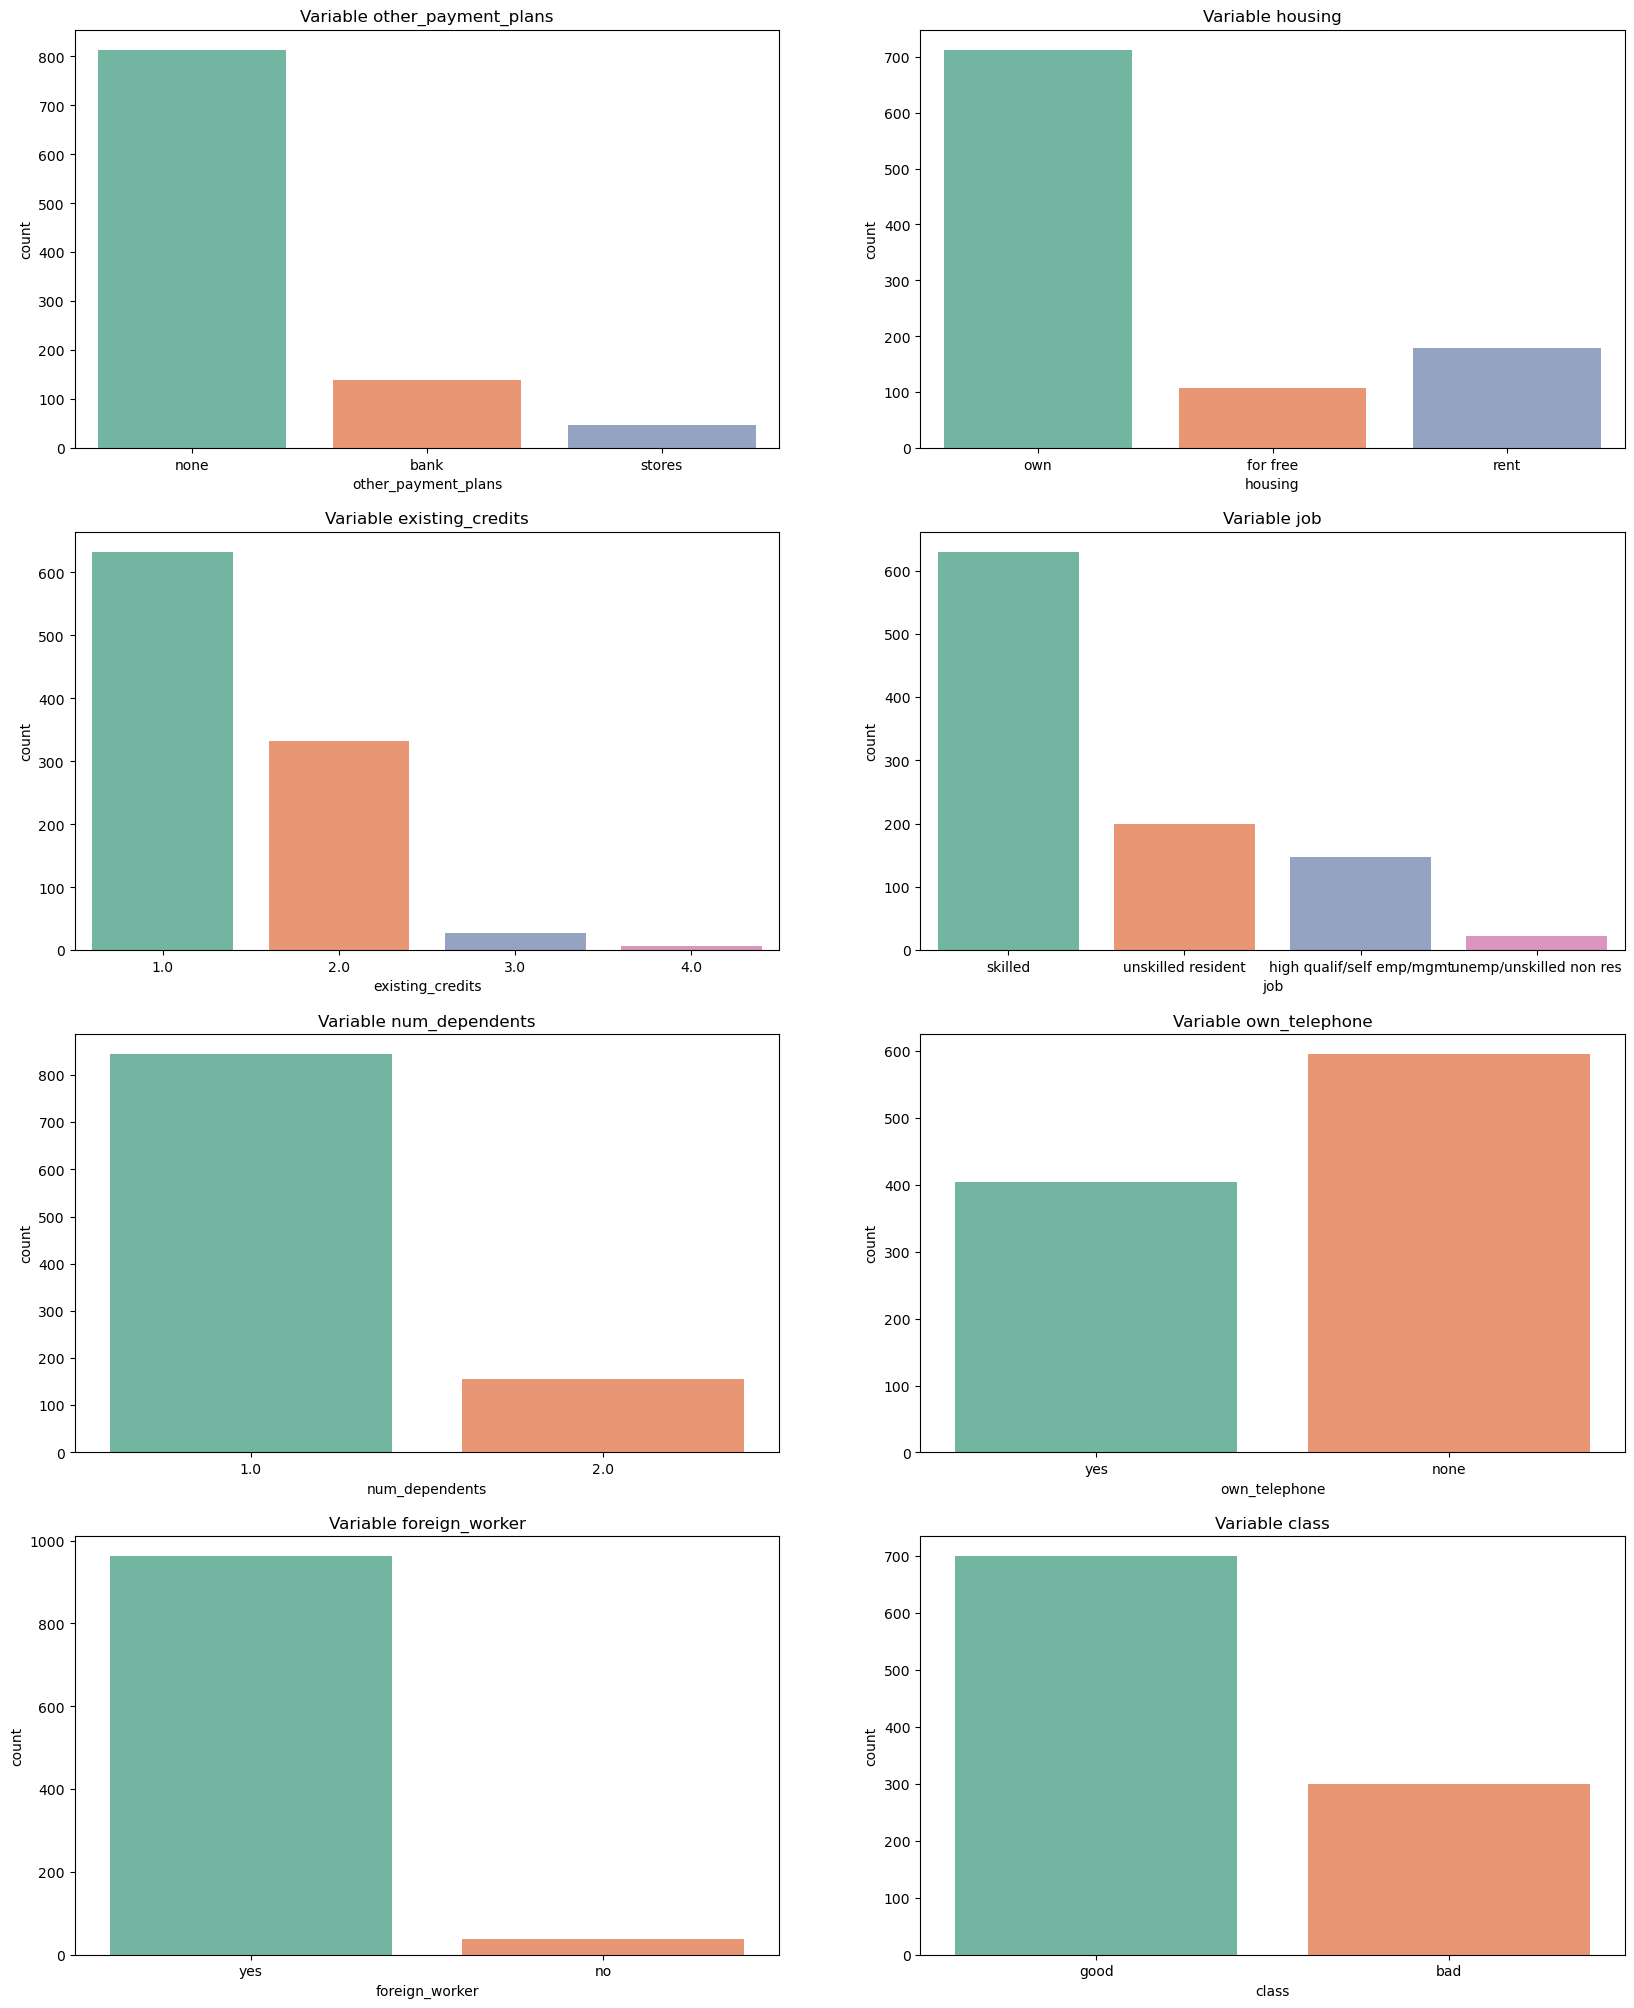

In [12]:
plt.figure(figsize = (20, 25))

plt.subplot(4, 2, 1)
plt.gca().set_title('Variable other_payment_plans')
sns.countplot(x = 'other_payment_plans', palette = 'Set2', data = df)

plt.subplot(4, 2, 2)
plt.gca().set_title('Variable housing')
sns.countplot(x = 'housing', palette = 'Set2', data = df)

plt.subplot(4, 2, 3)
plt.gca().set_title('Variable existing_credits')
sns.countplot(x = 'existing_credits', palette = 'Set2', data = df)

plt.subplot(4, 2, 4)
plt.gca().set_title('Variable job')
sns.countplot(x = 'job', palette = 'Set2', data = df)

plt.subplot(4, 2, 5)
plt.gca().set_title('Variable num_dependents')
sns.countplot(x = 'num_dependents', palette = 'Set2', data = df)

plt.subplot(4, 2, 6)
plt.gca().set_title('Variable own_telephone')
sns.countplot(x = 'own_telephone', palette = 'Set2', data = df)

plt.subplot(4, 2, 7)
plt.gca().set_title('Variable foreign_worker')
sns.countplot(x = 'foreign_worker', palette = 'Set2', data = df)

plt.subplot(4, 2, 8)
plt.gca().set_title('Variable class')
sns.countplot(x = 'class', palette = 'Set2', data = df)

<AxesSubplot:xlabel='age', ylabel='Count'>

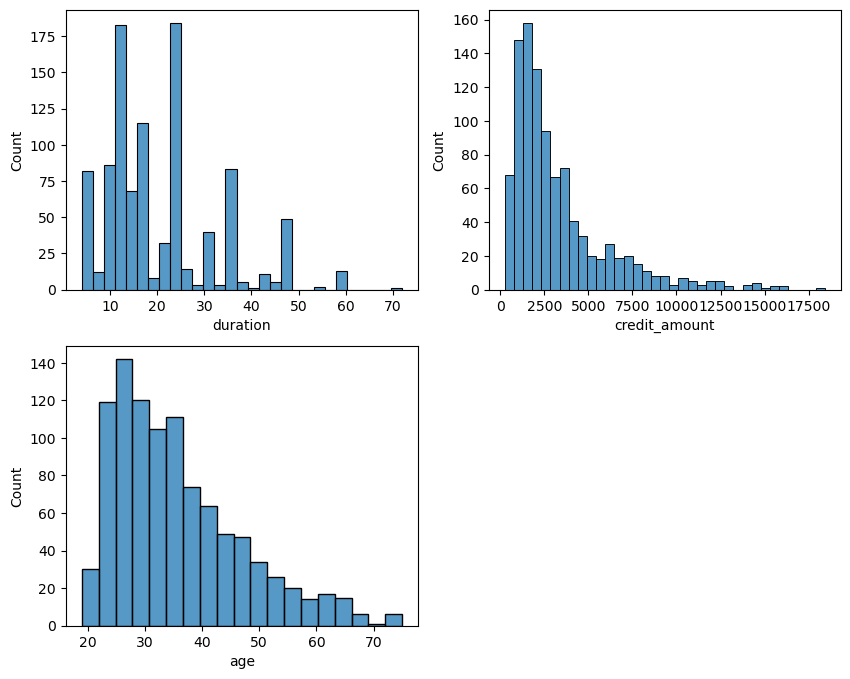

In [13]:
plt.figure(figsize = (10, 8))

plt.subplot(2, 2, 1)
sns.histplot(x = df['duration'], kde = False)

plt.subplot(2, 2, 2)
sns.histplot(x = df['credit_amount'], kde = False)

plt.subplot(2, 2, 3)
sns.histplot(x = df['age'], kde = False)


<AxesSubplot:title={'center':'Boxplot duration'}, xlabel='duration'>

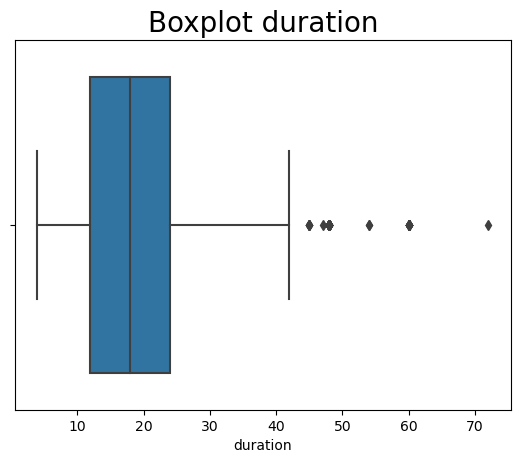

In [14]:
plt.title("Boxplot duration", fontdict = {'fontsize': 20})
sns.boxplot(x=df["duration"])

<AxesSubplot:title={'center':'Boxplot credit_amount'}, xlabel='credit_amount'>

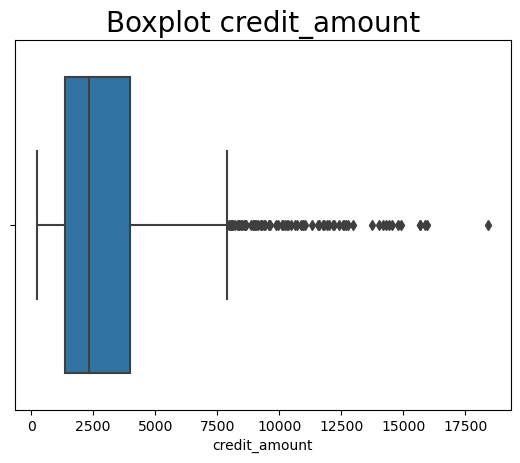

In [15]:
plt.title("Boxplot credit_amount", fontdict = {'fontsize': 20})
sns.boxplot(x=df["credit_amount"])

<AxesSubplot:title={'center':'Boxplot age'}, xlabel='age'>

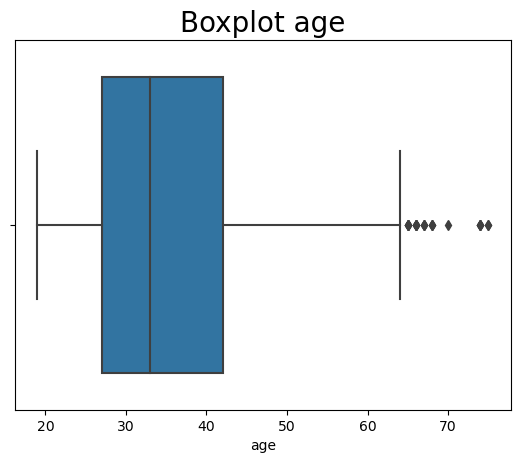

In [17]:
plt.title("Boxplot age", fontdict = {'fontsize': 20})
sns.boxplot(x=df["age"])

<AxesSubplot:title={'center':'Variable property_magnitude'}, xlabel='property_magnitude', ylabel='count'>

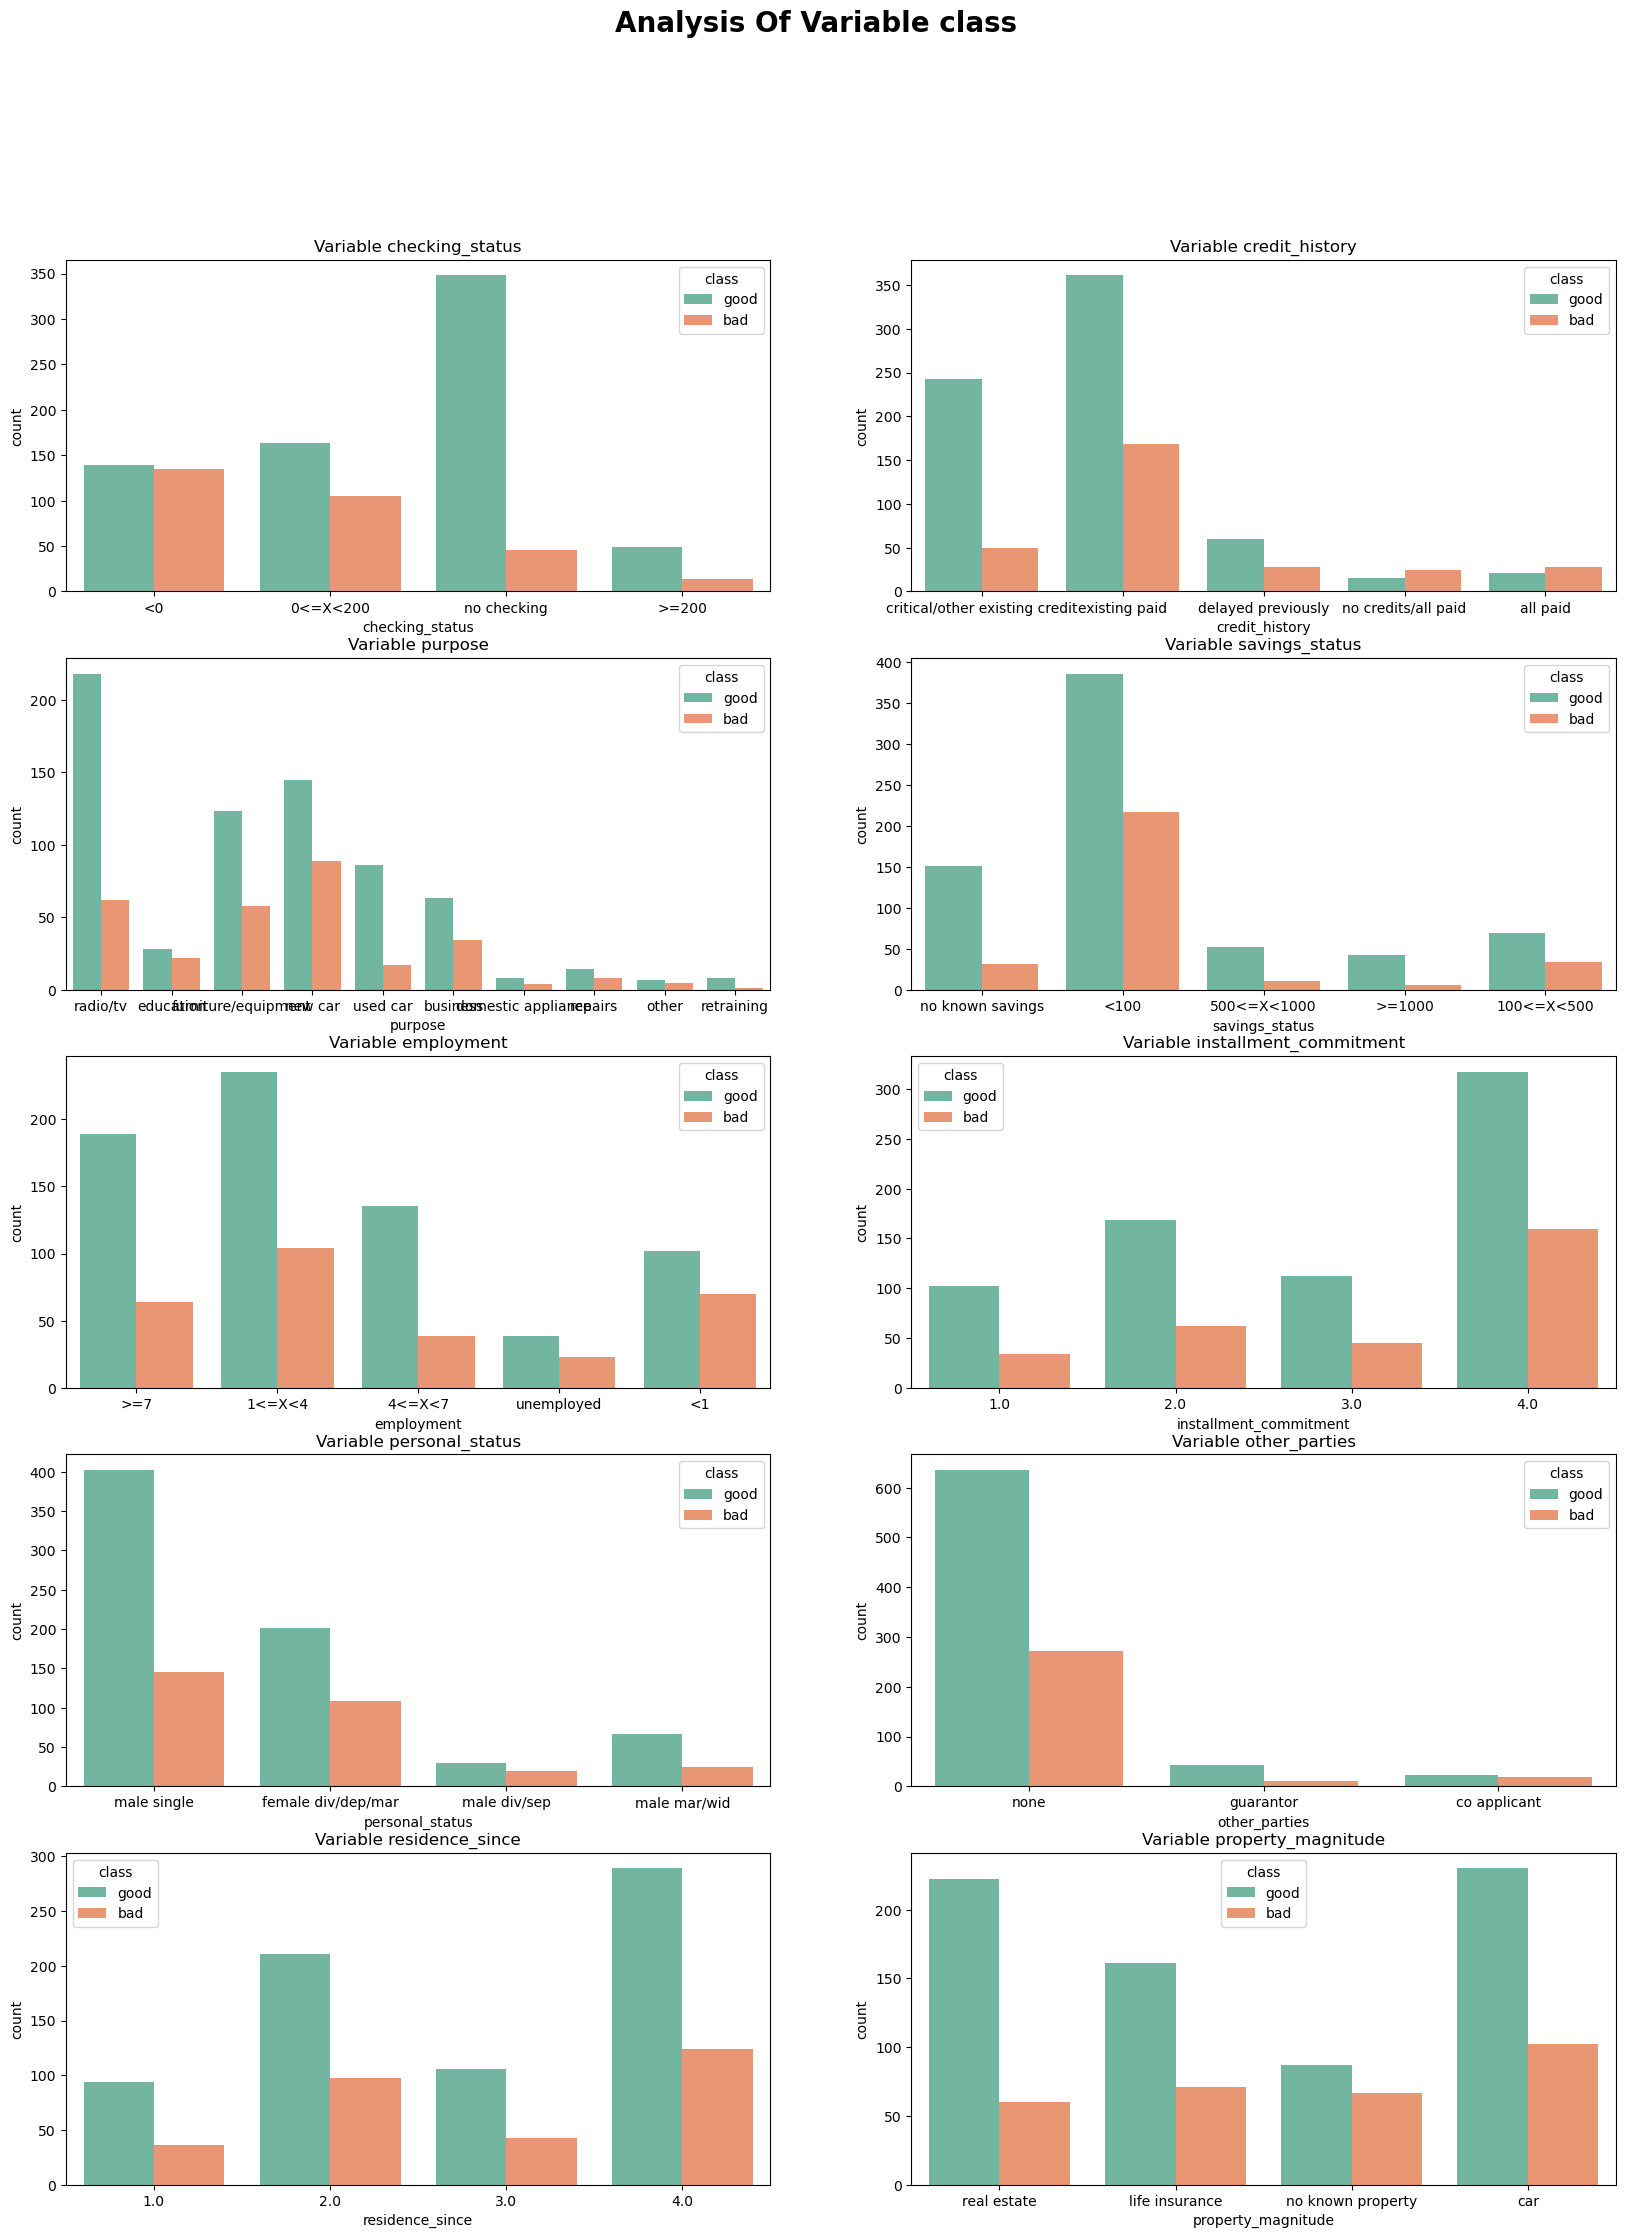

In [18]:
plt.figure(figsize = (20, 25))
plt.suptitle("Analysis Of Variable class",fontweight="bold", fontsize=20)

plt.subplot(5, 2, 1)
plt.gca().set_title('Variable checking_status')
sns.countplot(x = 'checking_status', hue = 'class', palette = 'Set2', data = df)

plt.subplot(5, 2, 2)
plt.gca().set_title('Variable credit_history')
sns.countplot(x = 'credit_history', hue = 'class', palette = 'Set2', data = df)

plt.subplot(5, 2, 3)
plt.gca().set_title('Variable purpose')
sns.countplot(x = 'purpose', hue = 'class', palette = 'Set2', data = df)

plt.subplot(5, 2, 4)
plt.gca().set_title('Variable savings_status')
sns.countplot(x = 'savings_status', hue = 'class', palette = 'Set2', data = df)

plt.subplot(5, 2, 5)
plt.gca().set_title('Variable employment')
sns.countplot(x = 'employment', hue = 'class', palette = 'Set2', data = df)

plt.subplot(5, 2, 6)
plt.gca().set_title('Variable installment_commitment')
sns.countplot(x = 'installment_commitment', hue = 'class', palette = 'Set2', data = df)

plt.subplot(5, 2, 7)
plt.gca().set_title('Variable personal_status')
sns.countplot(x = 'personal_status', hue = 'class', palette = 'Set2', data = df)

plt.subplot(5, 2, 8)
plt.gca().set_title('Variable other_parties')
sns.countplot(x = 'other_parties', hue = 'class', palette = 'Set2', data = df)

plt.subplot(5, 2, 9)
plt.gca().set_title('Variable residence_since')
sns.countplot(x = 'residence_since', hue = 'class', palette = 'Set2', data = df)

plt.subplot(5, 2, 10)
plt.gca().set_title('Variable property_magnitude')
sns.countplot(x = 'property_magnitude', hue = 'class', palette = 'Set2', data = df)

<AxesSubplot:title={'center':'Variable foreign_worker'}, xlabel='foreign_worker', ylabel='count'>

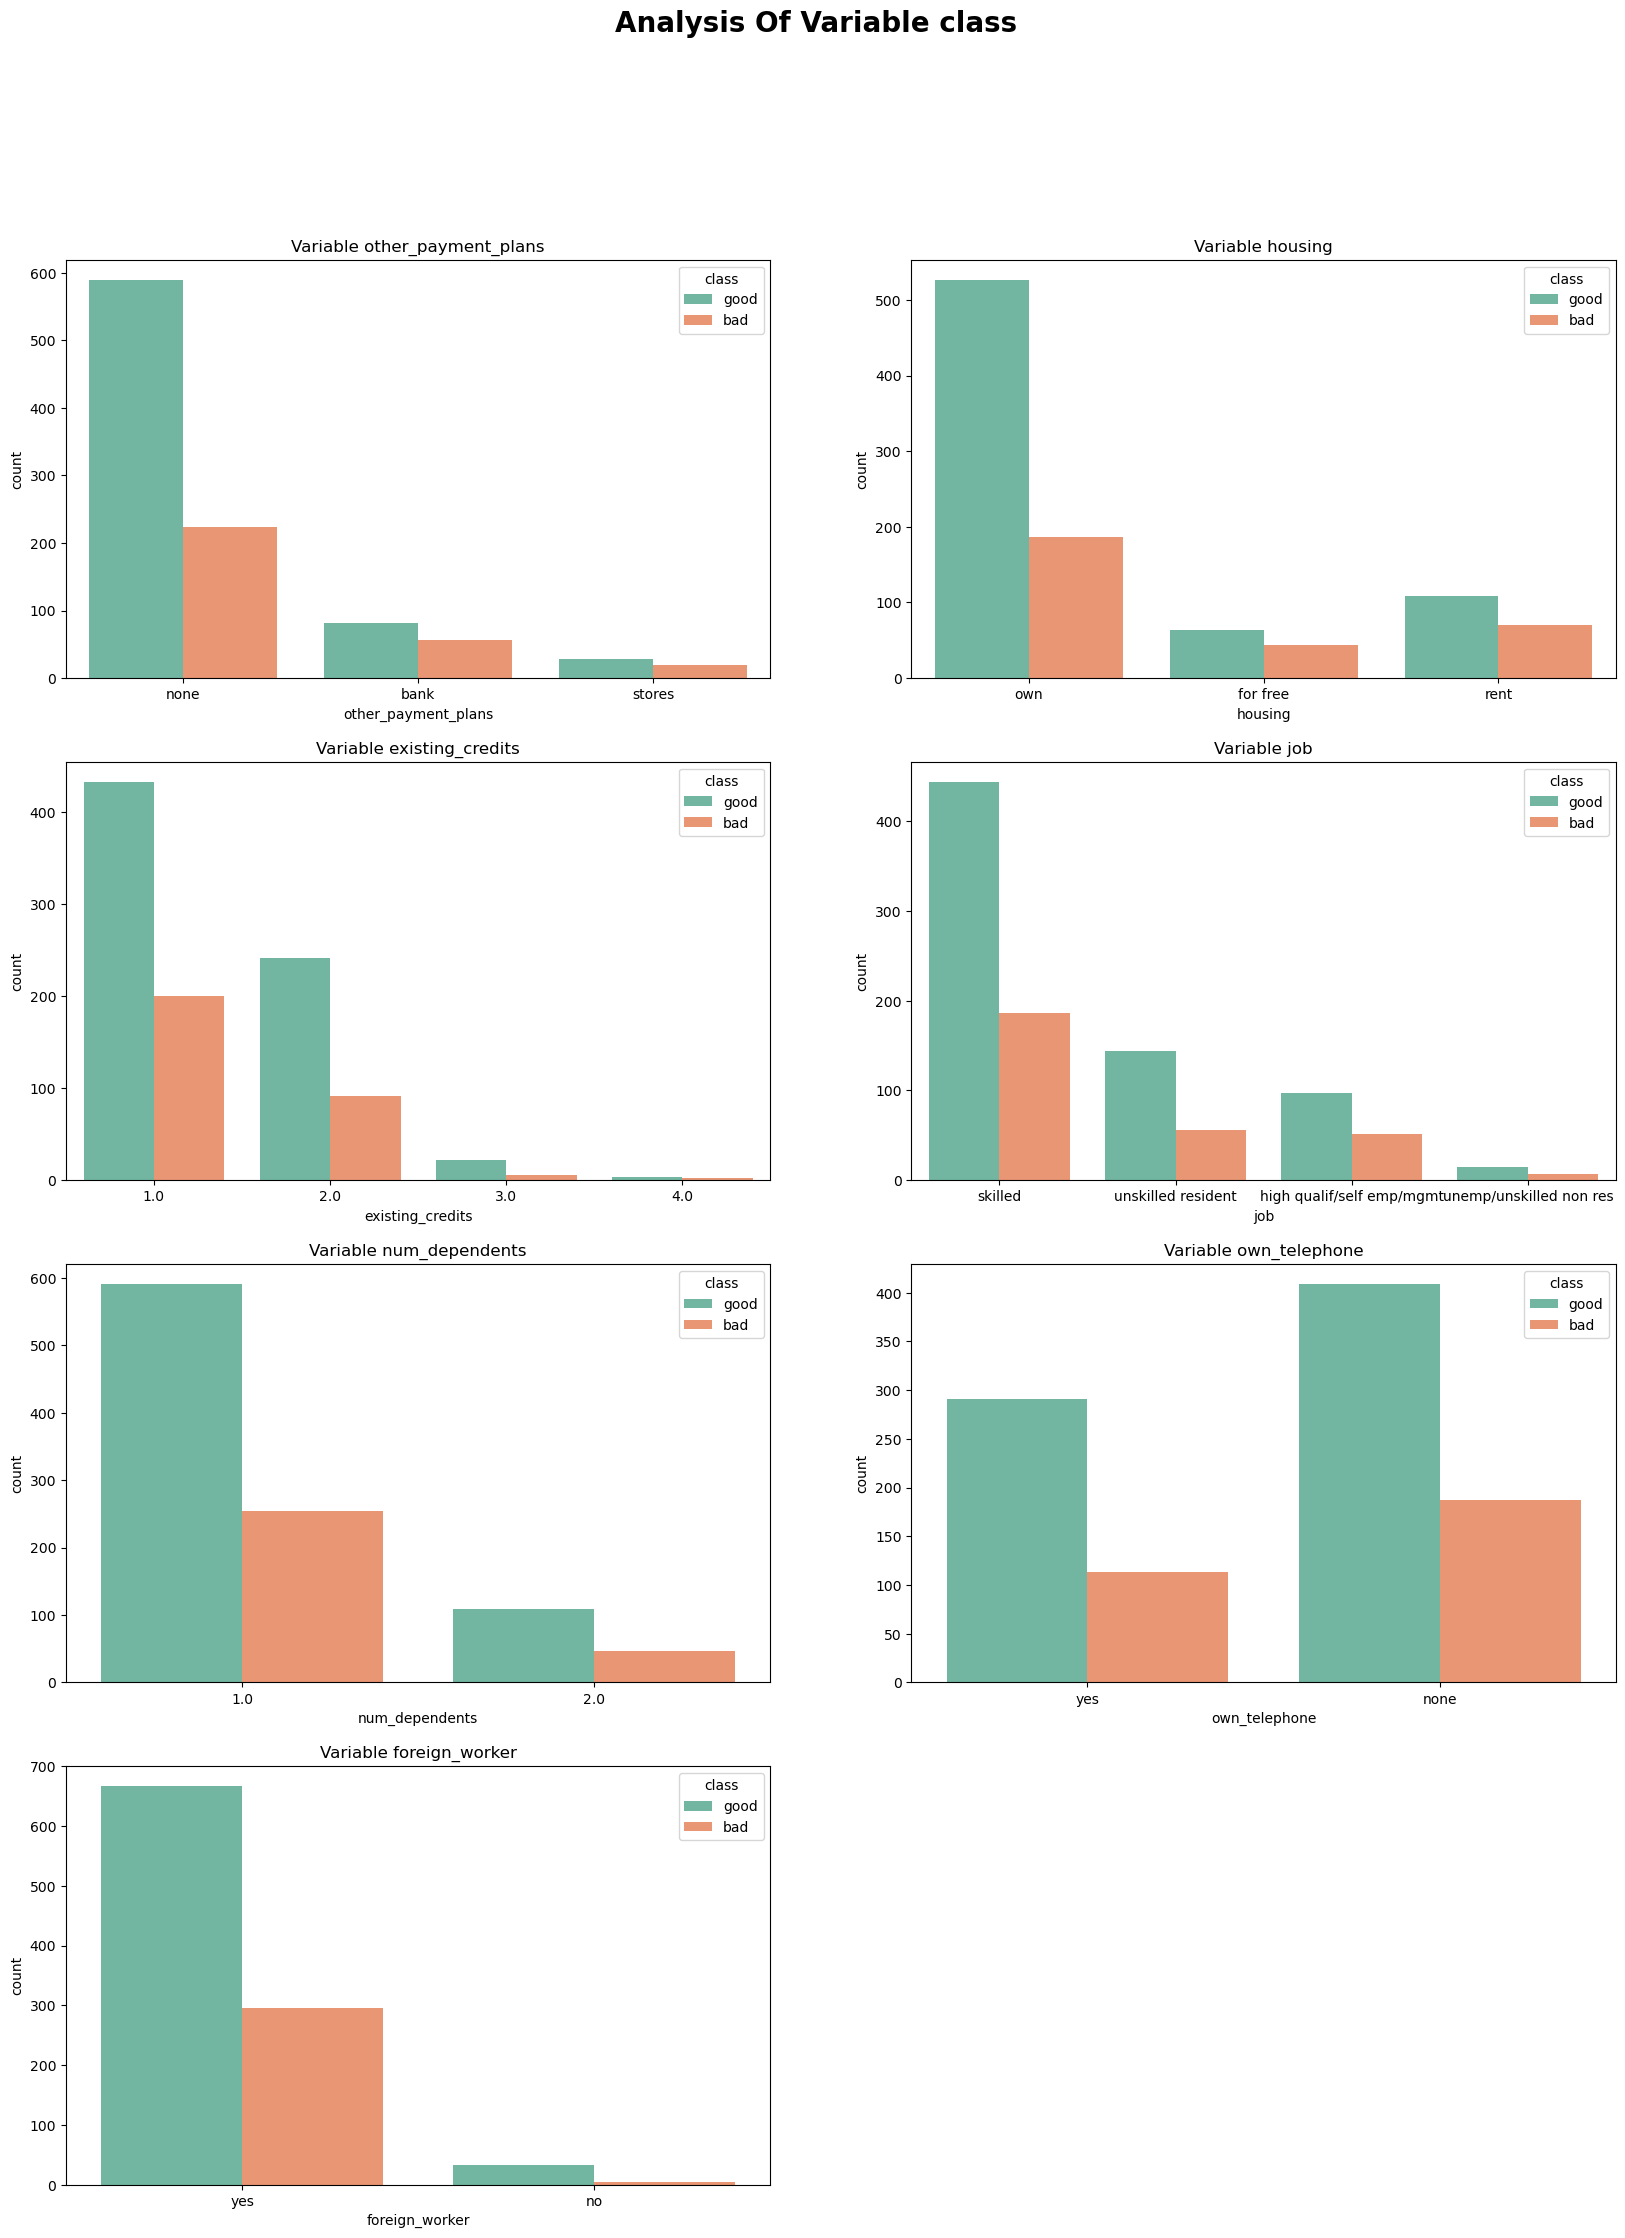

In [19]:
plt.figure(figsize = (20, 25))
plt.suptitle("Analysis Of Variable class",fontweight="bold", fontsize=20)

plt.subplot(4, 2, 1)
plt.gca().set_title('Variable other_payment_plans')
sns.countplot(x = 'other_payment_plans', hue = 'class', palette = 'Set2', data = df)

plt.subplot(4, 2, 2)
plt.gca().set_title('Variable housing')
sns.countplot(x = 'housing', hue = 'class', palette = 'Set2', data = df)

plt.subplot(4, 2, 3)
plt.gca().set_title('Variable existing_credits')
sns.countplot(x = 'existing_credits', hue = 'class', palette = 'Set2', data = df)

plt.subplot(4, 2, 4)
plt.gca().set_title('Variable job')
sns.countplot(x = 'job', hue = 'class', palette = 'Set2', data = df)

plt.subplot(4, 2, 5)
plt.gca().set_title('Variable num_dependents')
sns.countplot(x = 'num_dependents', hue = 'class', palette = 'Set2', data = df)

plt.subplot(4, 2, 6)
plt.gca().set_title('Variable own_telephone')
sns.countplot(x = 'own_telephone', hue = 'class', palette = 'Set2', data = df)

plt.subplot(4, 2, 7)
plt.gca().set_title('Variable foreign_worker')
sns.countplot(x = 'foreign_worker', hue = 'class', palette = 'Set2', data = df)

<AxesSubplot:xlabel='class', ylabel='age'>

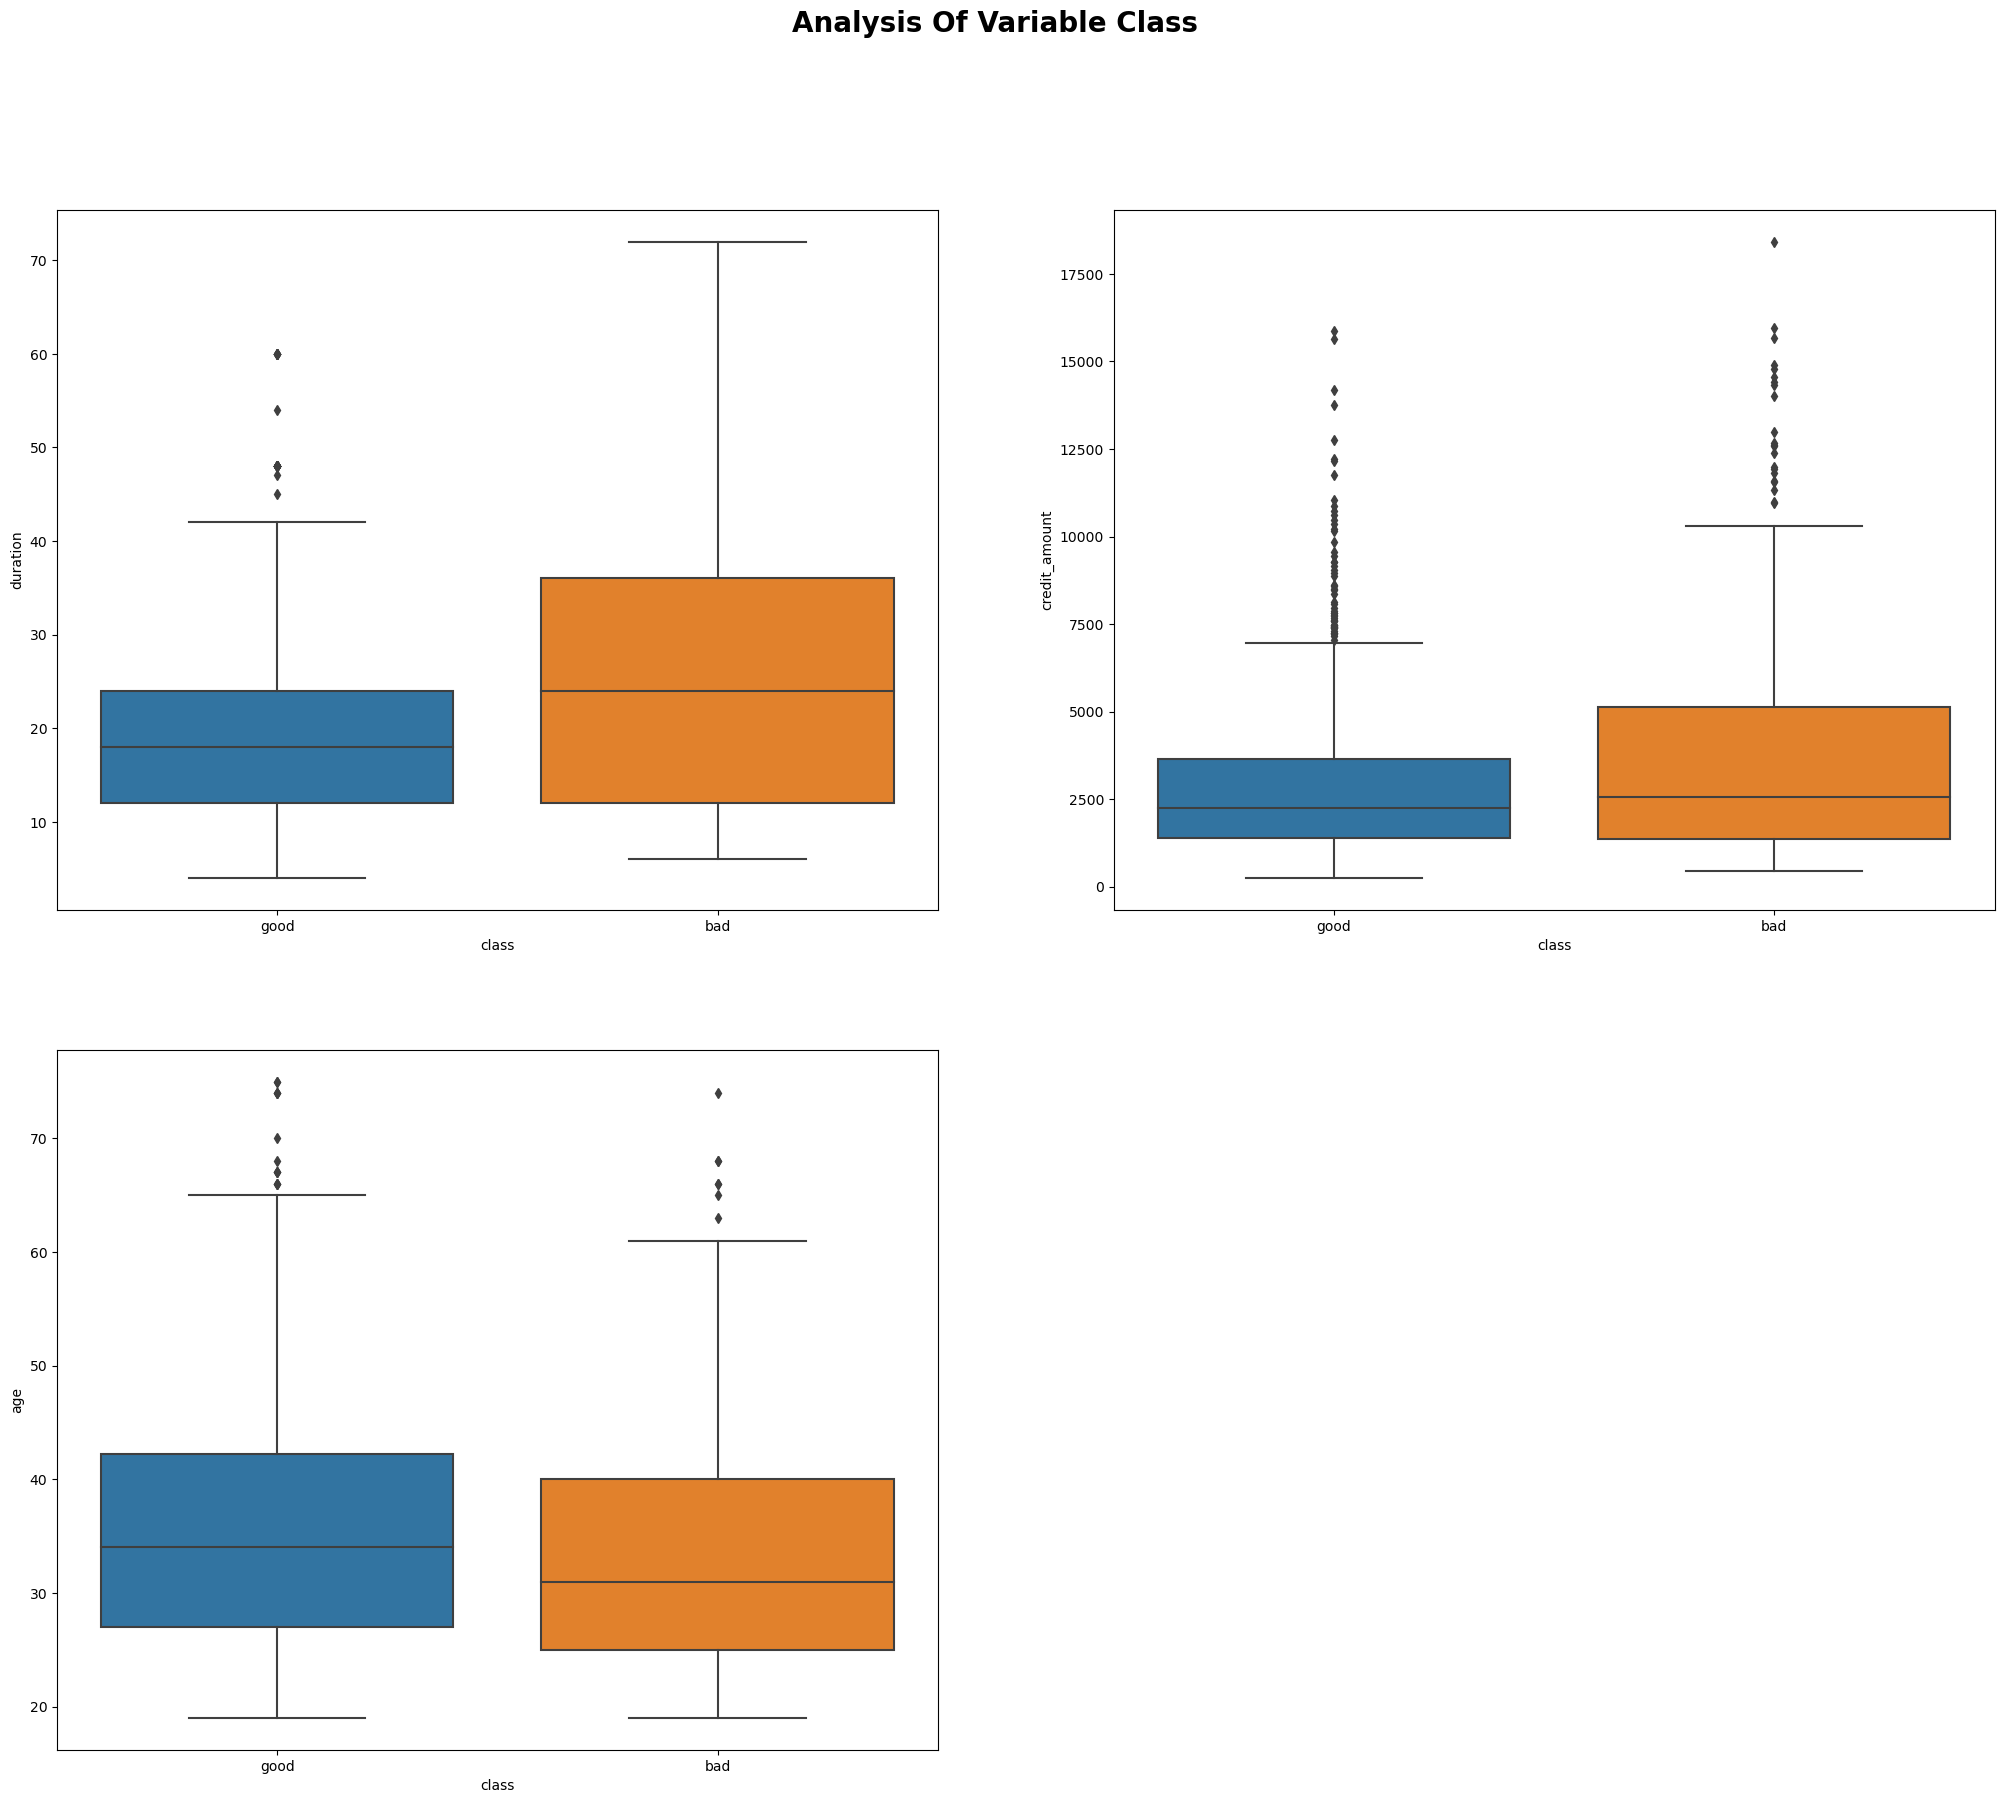

In [20]:
plt.figure(figsize = (25, 20))
plt.suptitle("Analysis Of Variable Class",fontweight="bold", fontsize=20)

plt.subplot(2,2,1)
sns.boxplot(x="class", y="duration", data=df)

plt.subplot(2,2,2)
sns.boxplot(x="class", y="credit_amount", data=df)

plt.subplot(2,2,3)
sns.boxplot(x="class", y="age", data=df)

In [21]:
hot = pd.get_dummies(df[['credit_history', 'checking_status', 'purpose', 'savings_status', 
                        'employment', 'personal_status', 'other_parties', 
                        'installment_commitment', 'residence_since', 'property_magnitude', 
                        'other_payment_plans', 'housing', 'existing_credits', 
                        'job', 'num_dependents', 'own_telephone', 'foreign_worker']])

In [22]:
df = pd.concat([df, hot], axis = 1)
df = df.drop(['credit_history', 'checking_status', 'purpose', 'savings_status', 
                        'employment', 'personal_status', 'other_parties', 
                        'installment_commitment', 'residence_since', 'property_magnitude', 
                        'other_payment_plans', 'housing', 'existing_credits', 
                        'job', 'num_dependents', 'own_telephone', 'foreign_worker'], axis = 1)

In [23]:
label_encoder_class = LabelEncoder()
df['class'] = label_encoder_class.fit_transform(df['class'])

In [24]:
X = df.drop('class', axis = 1)
X = X.values
y = df['class']

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(X_standard, y, test_size = 0.3, random_state = 0)



In [43]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
x_train, y_train = ros.fit_resample(x_train, y_train)

In [39]:
x_train.shape, y_train.shape


((972, 57), (972,))

## SVM


In [44]:
model = SVC()
model.fit(x_train, y_train)
accuracy = model.score(x_test, y_test)
y_pred = model.predict(x_test)

In [47]:
from sklearn.metrics import precision_score, recall_score 

print("Accuracy: ", accuracy.round(2))
print("Precision: ", precision_score(y_test, y_pred ).round(2))
print("Recall: ", recall_score(y_test, y_pred).round(2))

Accuracy:  0.73
Precision:  0.83
Recall:  0.79


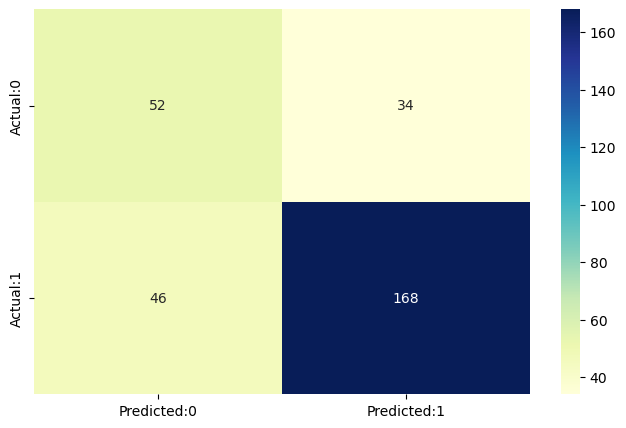

In [49]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.53      0.60      0.57        86
           1       0.83      0.79      0.81       214

    accuracy                           0.73       300
   macro avg       0.68      0.69      0.69       300
weighted avg       0.75      0.73      0.74       300



## Naive Bayes

In [51]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)
previsoes = naive_bayes.predict(x_test)



In [52]:
print("Accuracy: ", accuracy.round(2))
print("Precision: ", precision_score(y_test, y_pred ).round(2))
print("Recall: ", recall_score(y_test, y_pred).round(2))

Accuracy:  0.73
Precision:  0.83
Recall:  0.79


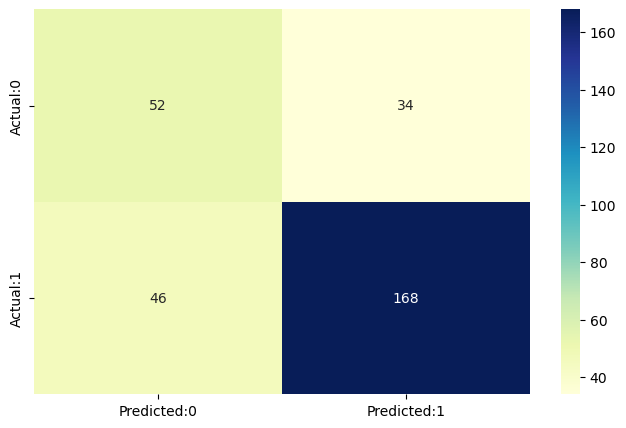

In [53]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.53      0.60      0.57        86
           1       0.83      0.79      0.81       214

    accuracy                           0.73       300
   macro avg       0.68      0.69      0.69       300
weighted avg       0.75      0.73      0.74       300



## Decision Tree

In [106]:
parameters = {'max_depth': [3, 4, 5, 6, 7, 9, 11],
              'min_samples_split': [2, 3, 4, 5, 6, 7],
              'criterion': ['entropy', 'gini']
             }

model = DecisionTreeClassifier()
gridDecisionTree = RandomizedSearchCV(model, parameters, cv = 3, n_jobs = -1)
gridDecisionTree.fit(X_train, y_train)

print('Mín Split: ', gridDecisionTree.best_estimator_.min_samples_split)
print('Max Nvl: ', gridDecisionTree.best_estimator_.max_depth)
print('Algorithm: ', gridDecisionTree.best_estimator_.criterion)
print('Score: ', gridDecisionTree.best_score_)

Mín Split:  4
Max Nvl:  11
Algorithm:  entropy
Score:  0.7746913580246914


In [107]:
decision_tree = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 2, max_depth= 9, random_state=0)
decision_tree.fit(X_train, y_train)
y_pred= decision_tree.predict(X_test)


In [56]:
print("Accuracy: ", accuracy.round(2))
print("Precision: ", precision_score(y_test, y_pred ).round(2))
print("Recall: ", recall_score(y_test, y_pred).round(2))

Accuracy:  0.7
Precision:  0.81
Recall:  0.76


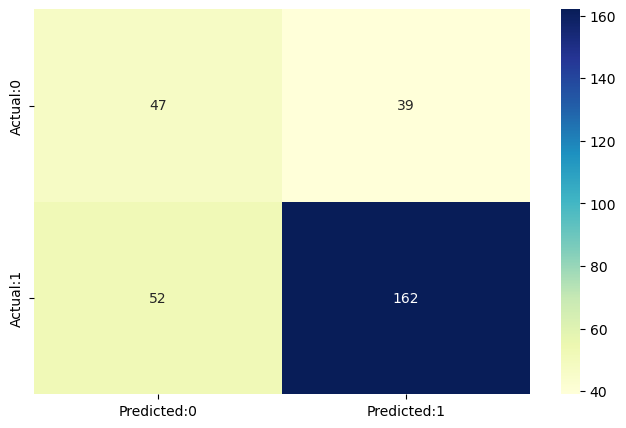

In [57]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.47      0.55      0.51        86
           1       0.81      0.76      0.78       214

    accuracy                           0.70       300
   macro avg       0.64      0.65      0.64       300
weighted avg       0.71      0.70      0.70       300



## Artificial Neural Network (ANN)

In [60]:
model = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1000, random_state=42) 
model.fit(x_train, y_train)
accuracy = model.score(x_test, y_test)
y_pred = model.predict(x_test)

In [61]:
print("Accuracy: ", accuracy.round(2))
print("Precision: ", precision_score(y_test, y_pred ).round(2))
print("Recall: ", recall_score(y_test, y_pred).round(2))

Accuracy:  0.7
Precision:  0.79
Recall:  0.79


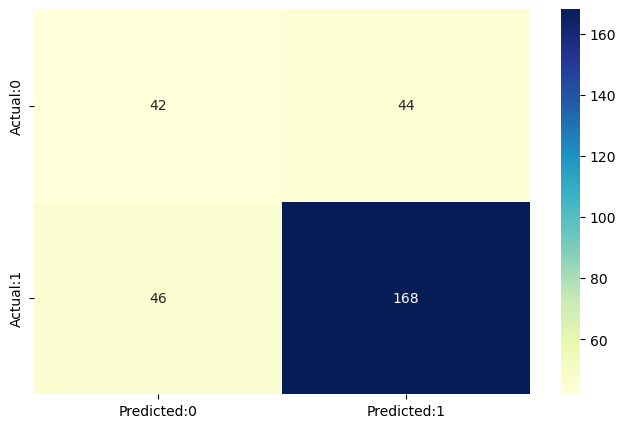

In [62]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.48      0.49      0.48        86
           1       0.79      0.79      0.79       214

    accuracy                           0.70       300
   macro avg       0.63      0.64      0.64       300
weighted avg       0.70      0.70      0.70       300



## K-Means Clustering Results

In [104]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 2, random_state= 0)
model.fit(x_train)
y_pred = model.predict(x_test)

In [105]:
print("Accuracy: ", accuracy.round(2))
print("Precision: ", precision_score(y_test, y_pred ).round(2))
print("Recall: ", recall_score(y_test, y_pred).round(2))

Accuracy:  0.69
Precision:  0.76
Recall:  0.83


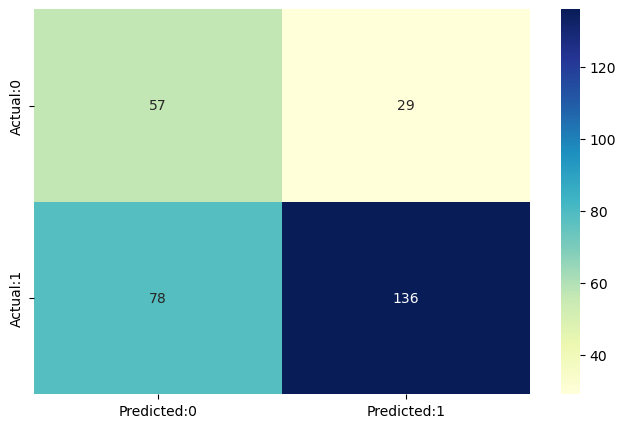

In [66]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [67]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.42      0.66      0.52        86
           1       0.82      0.64      0.72       214

    accuracy                           0.64       300
   macro avg       0.62      0.65      0.62       300
weighted avg       0.71      0.64      0.66       300



## K-Nearest Neighbors (KNN)

In [97]:
knn = KNeighborsClassifier()

k_list = list(range(1,10))
k_values = dict(n_neighbors = k_list)
grid = GridSearchCV(knn, k_values, cv = 2, scoring = 'accuracy', n_jobs = -1)
grid.fit(X_train, y_train)


grid.best_params_, grid.best_score_

/Users/SalmaDkier/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/SalmaDkier/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

({'n_neighbors': 1}, 0.8302469135802468)

In [103]:
knn = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

/Users/SalmaDkier/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [99]:
print("Accuracy: ", accuracy.round(2))
print("Precision: ", precision_score(y_test, y_pred ).round(2))
print("Recall: ", recall_score(y_test, y_pred).round(2))

Accuracy:  0.69
Precision:  0.83
Recall:  0.7


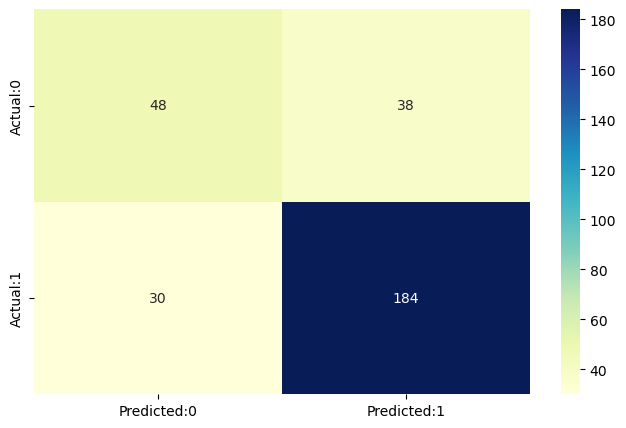

In [70]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.56      0.59        86
           1       0.83      0.86      0.84       214

    accuracy                           0.77       300
   macro avg       0.72      0.71      0.71       300
weighted avg       0.77      0.77      0.77       300



## Random Forest

In [87]:
from sklearn.ensemble import RandomForestClassifier

parameters = {'max_depth': [3, 4, 5, 6, 7, 9, 11],
              'min_samples_split': [2, 3, 4, 5, 6, 7],
              'criterion': ['entropy', 'gini']
             }

model = RandomForestClassifier()
gridRandomForest = RandomizedSearchCV(model, parameters, cv = 5, n_jobs = -1)
gridRandomForest.fit(x_train, y_train)

print('Algorithm: ', gridRandomForest.best_estimator_.criterion)
print('Score: ', gridRandomForest.best_score_)
print('Mín Split: ', gridRandomForest.best_estimator_.min_samples_split)
print('Max Nvl: ', gridRandomForest.best_estimator_.max_depth)

Algorithm:  entropy
Score:  0.8292783505154638
Mín Split:  6
Max Nvl:  11


In [102]:
random_forest = RandomForestClassifier(n_estimators = 100, min_samples_split = 6, max_depth= 9,  criterion = 'entropy', random_state = 0)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)



In [89]:
print("Accuracy: ", accuracy.round(2))
print("Precision: ", precision_score(y_test, y_pred ).round(2))
print("Recall: ", recall_score(y_test, y_pred).round(2))

Accuracy:  0.69
Precision:  0.83
Recall:  0.7


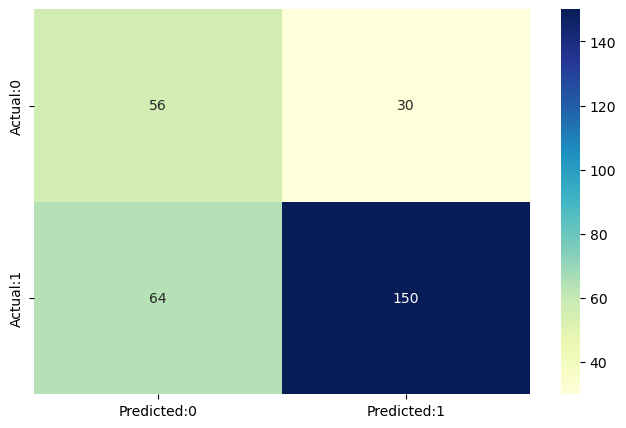

In [90]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [91]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.47      0.65      0.54        86
           1       0.83      0.70      0.76       214

    accuracy                           0.69       300
   macro avg       0.65      0.68      0.65       300
weighted avg       0.73      0.69      0.70       300



In [92]:
score_random = 0.76


In [93]:
feature_imp_random = pd.Series(random_forest.feature_importances_, index = columns).sort_values(ascending = False)
feature_imp_random

credit_amount                                    0.110127
duration                                         0.099887
checking_status_no checking                      0.083168
age                                              0.069256
checking_status_<0                               0.064232
credit_history_critical/other existing credit    0.027021
purpose_used car                                 0.024643
employment_<1                                    0.022875
checking_status_0<=X<200                         0.020537
savings_status_no known savings                  0.020203
property_magnitude_real estate                   0.018371
credit_history_no credits/all paid               0.018200
savings_status_<100                              0.017577
other_payment_plans_none                         0.015710
purpose_new car                                  0.015123
housing_own                                      0.014796
other_payment_plans_bank                         0.013849
credit_history

## Logistic Regression

In [100]:
logistic = LogisticRegression(random_state = 1, max_iter=1000)
logistic.fit(x_train, y_train)
y_pred = logistic.predict(x_test)

In [101]:
print("Accuracy: ", accuracy.round(2))
print("Precision: ", precision_score(y_test, y_pred ).round(2))
print("Recall: ", recall_score(y_test, y_pred).round(2))

Accuracy:  0.69
Precision:  0.83
Recall:  0.7


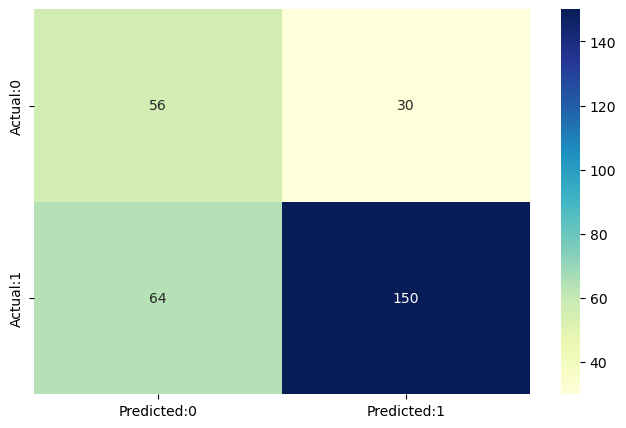

In [79]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [80]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.47      0.65      0.54        86
           1       0.83      0.70      0.76       214

    accuracy                           0.69       300
   macro avg       0.65      0.68      0.65       300
weighted avg       0.73      0.69      0.70       300

